### Load Data

In [15]:
load("brfss2013.Rdata")
library(ggplot2)
library(dplyr)

In [16]:
df = brfss2013

### Q1: People quit smoking
smoke100: Smoked At Least 100 Cigarettes  
smokday2: Frequency Of Days Now Smoking  
stopsmk2: Stopped Smoking In Past 12 Months

In [17]:
df1 = df[, c("smoke100", "stopsmk2","smokday2")]
df1 = df1[complete.cases(df1), ]
head(df1)

,smoke100,stopsmk2,smokday2
3,Yes,Yes,Some days
8,Yes,No,Every day
12,Yes,Yes,Every day
14,Yes,Yes,Some days
15,Yes,No,Every day
18,Yes,No,Every day


In [18]:
sub_df1 = df1[df1$smoke100=="Yes", ]
str(sub_df1$smokday2)

 Factor w/ 3 levels "Every day","Some days",..: 2 1 1 2 1 1 1 1 1 1 ...


In [19]:
library(dplyr)
g = sub_df1 %>%
    group_by(stopsmk2, smokday2) %>%
    summarise(ct=n()) %>%
    mutate(freq=100*ct/sum(ct)) %>%
    mutate(pos=(cumsum(freq) - 0.5 * freq))
g

,stopsmk2,smokday2,ct,freq,pos
1,Yes,Every day,27429,62.74362,31.37181
2,Yes,Some days,16287,37.25638,81.37181
3,No,Every day,27602,84.57791,42.28895
4,No,Some days,5033,15.42209,92.28895


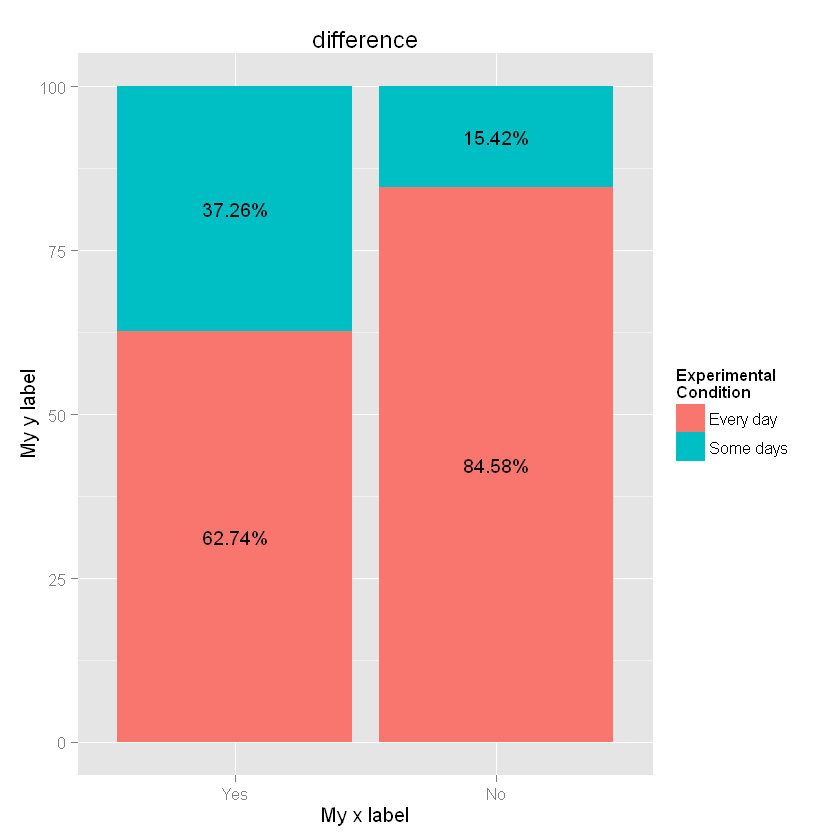

In [20]:
ggplot(data=g, aes(x=factor(stopsmk2), y=freq, fill=smokday2)) + geom_bar(stat='identity')+  
labs(title = 'difference', x = "My x label", y = "My y label") +
scale_fill_discrete(name="Experimental\nCondition") +
geom_text(aes(x = stopsmk2, y = pos, 
        ymax = 15, label=paste0(sprintf("%.2f", freq), "%")), size=4)

### Q2: Income level vs. vege and fruits intake
_incomg: Computed Income Categories   
frutda1_: Computed Fruit Intake In Times Per Day   
vegeda1_: Computed Vegetable Intake In Times Per Day

In [21]:
df2 = df[, c("X_incomg", "ftjuda1_", "vegeda1_")]
names(df2) = c("income", "fruit_intake", "vege_intake")
df2 = df2[complete.cases(df2), ]
dim(df2)

[1] 387539      3

In [22]:
summary(df2$fruit_intake)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0    13.0    39.1    67.0  9900.0 

Warning message:
: Removed 3033 rows containing missing values (geom_point).Warning message:
: Removed 1264 rows containing missing values (geom_point).Warning message:
: Removed 1916 rows containing missing values (geom_point).Warning message:
: Removed 2048 rows containing missing values (geom_point).Warning message:
: Removed 5025 rows containing missing values (geom_point).

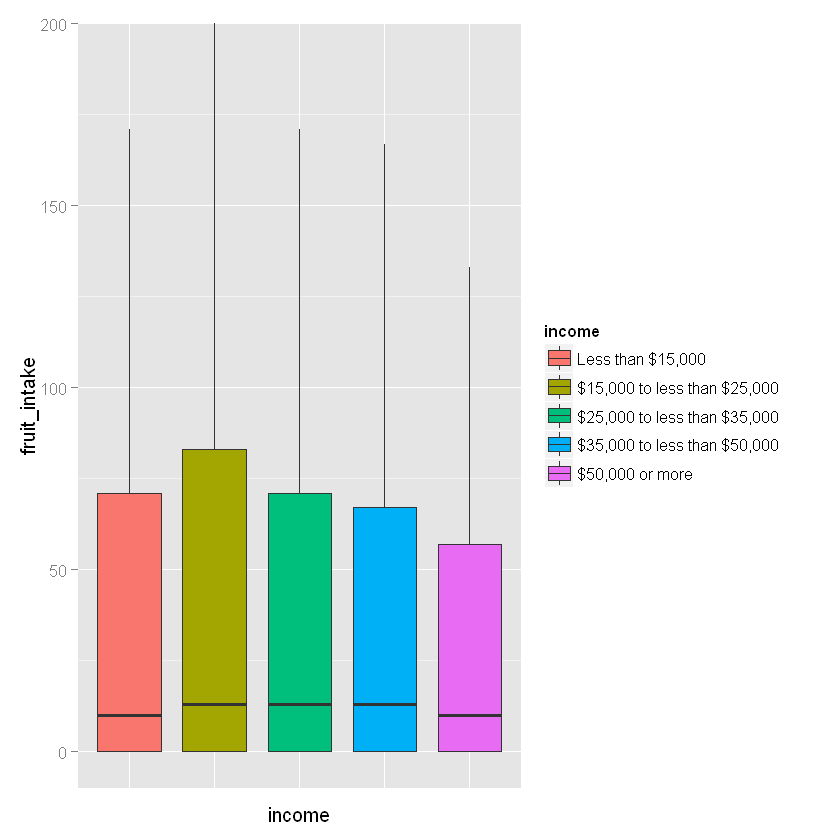

In [23]:
ggplot(aes(y = fruit_intake, x = income, fill=income), data = df2) + 
           geom_boxplot(outlier.shape = NA) + theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
coord_cartesian(ylim = c(-10, 200))

### Q3: Smoking vs. physical activities

sex: people's gender  
_pacat1: Physical Activity Categories  
_rfsmok3: Current Smoking Calculated Variable

In [24]:
df3 = df[, c("sex", "X_rfsmok3", "X_pacat1")]
df3 = df3[complete.cases(df3),]
names(df3) = c("sex", "smoker", "activity_level")
head(df3)

,sex,smoker,activity_level
1,Female,No,Inactive
2,Female,No,Insufficiently active
3,Female,Yes,Inactive
4,Female,No,Insufficiently active
5,Male,No,Inactive
6,Female,No,Insufficiently active


In [25]:
g_df3 = group_by(df3, sex, smoker, activity_level )
s_df3 = summarise(g_df3, ct=n())
s_df3 = mutate(s_df3, freq=100*ct/sum(ct))
s_df3 = mutate(s_df3, pos=(cumsum(freq) - 0.5 * freq))

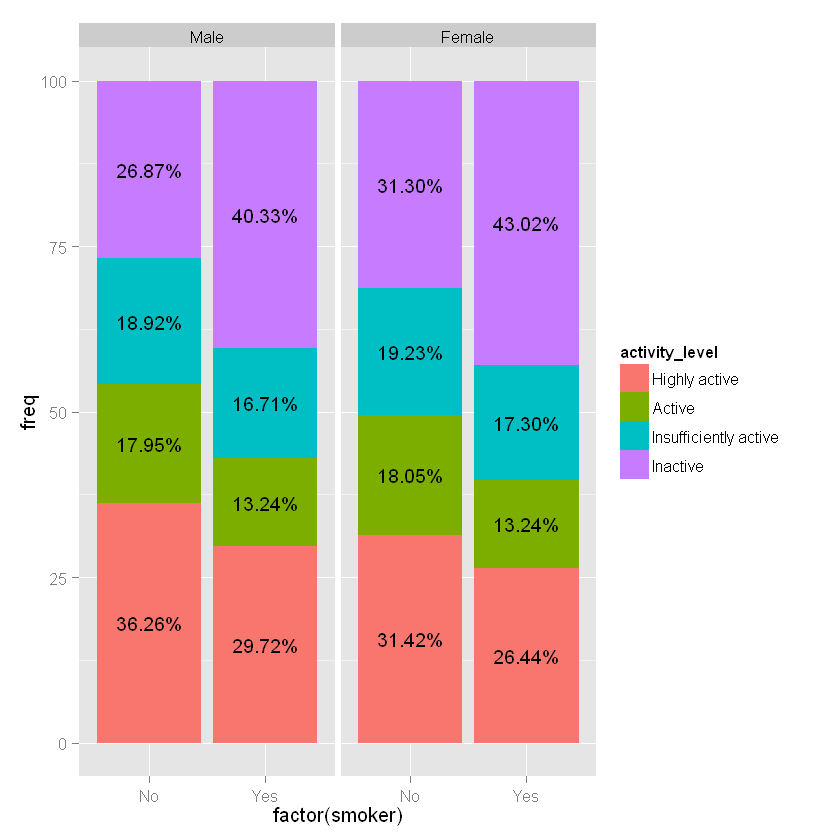

In [26]:
ggplot(data=s_df3, aes(x=factor(smoker), y=freq, fill=activity_level)) + geom_bar(stat='identity')+  
facet_wrap( ~ sex, ncol=2) +
geom_text(aes(x = smoker, y = pos, 
        ymax = 15, label=paste0(sprintf("%.2f", freq), "%")), size=4)